In [5]:
import pathlib
import pandas as pd
import Levenshtein 
import numpy as np
csvs = pathlib.Path("./sample_generated_tweets/").glob("*.csv")

original_tweets = pd.read_fwf(r"./dataset/combined_Musk_tweets_cleaned.txt", header = None)
original_tweets.columns = ['text']
results = []
for csv in csvs:
    dists = []
    sims = [] 
    result = {}
    generated_tweets = pd.read_csv(csv,index_col=0)
    #display(original_tweets)
    #display(generated_tweets)
    for generated_tweet in generated_tweets["output"]:
        min_dist = np.inf
        min_sim = 0#np.inf
        most_similar_original = ""
        for original_tweet in original_tweets["text"]:
            s = Levenshtein.ratio(original_tweet, generated_tweet)
            d = Levenshtein.distance(original_tweet, generated_tweet)
            if d < min_dist:
                min_dist = d
                most_similar_original = original_tweet
            if s > min_sim:
                min_sim = s
                #most_similar_original = original_tweet
        dists.append(min_dist)
        sims.append(min_sim)
    result["name"] = csv.name
    result["avg_dist"] = np.mean(dists)
    result["avg_sim"] = np.mean(sims)
    results.append(result)
    #print(f"{csv.name}: {np.mean(dists)}")

In [6]:
results

[{'name': 'gpt2_net_scratch.csv',
  'avg_dist': 81.76923076923077,
  'avg_sim': 0.5095877521466777},
 {'name': 'rnn_scratch_gpt2-trained.csv',
  'avg_dist': 145.8846153846154,
  'avg_sim': 0.4628242648889149},
 {'name': 'gpt2_fine_tuned.csv',
  'avg_dist': 88.65384615384616,
  'avg_sim': 0.5161782374115638},
 {'name': 'lstm_gpt2.csv', 'avg_dist': 142.5, 'avg_sim': 0.4569192518692698},
 {'name': 'lstm_word.csv',
  'avg_dist': 188.19230769230768,
  'avg_sim': 0.4547424942677725},
 {'name': 'lstm_char.csv',
  'avg_dist': 31.923076923076923,
  'avg_sim': 0.5526066699099328},
 {'name': 'rnn_scratch_char.csv',
  'avg_dist': 31.384615384615383,
  'avg_sim': 0.5579131556248119},
 {'name': 'gru_word.csv',
  'avg_dist': 183.42307692307693,
  'avg_sim': 0.4745019060959654},
 {'name': 'gru_gpt2.csv',
  'avg_dist': 150.3846153846154,
  'avg_sim': 0.47154735437454476},
 {'name': 'gpt2_tokenizer_scratch.csv',
  'avg_dist': 81.11538461538461,
  'avg_sim': 0.49554649653447125},
 {'name': 'gru_gpt2-trai

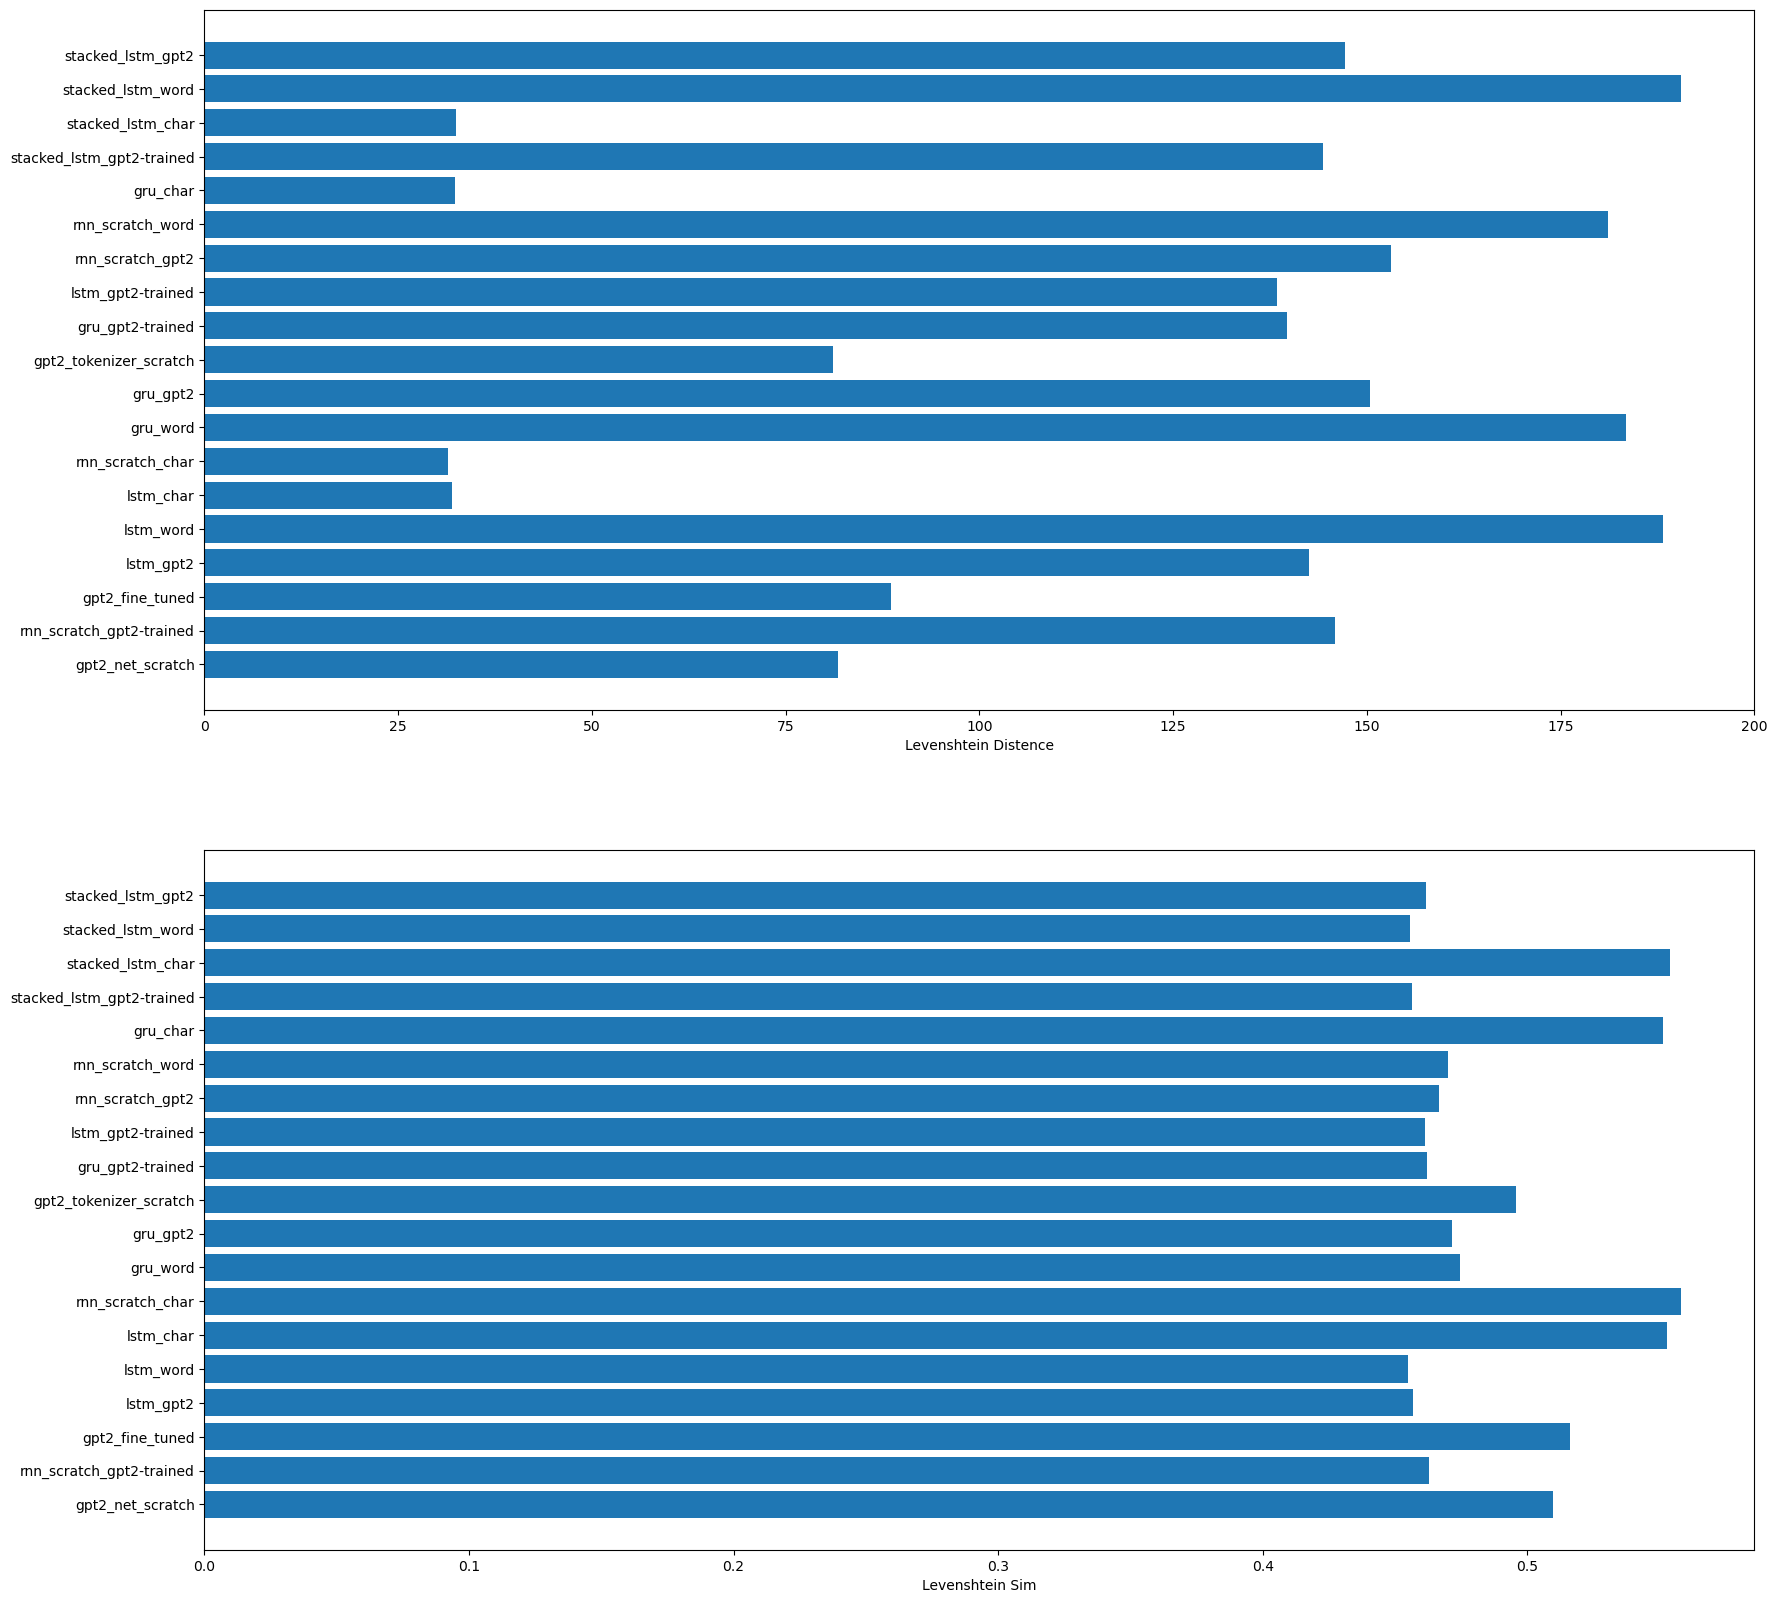

In [33]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

name = []
avg_dist = []
avg_sim = []
for result in results:
    name.append(result["name"].replace(".csv",""))
    avg_dist.append(result["avg_dist"])
    avg_sim.append(result["avg_sim"])
y_pos = np.arange(len(name))

fig = plt.figure(figsize=(20,20)) 
#plt.tick_params(axis='x', labelsize=8)
plt.subplot(2,1,1)
plt.barh(y_pos, avg_dist, align='center')
plt.yticks(y_pos, name)
plt.xlabel('Levenshtein Distence')


plt.subplot(2,1,2)
plt.barh(y_pos, avg_sim, align='center')
plt.yticks(y_pos, name)
plt.xlabel('Levenshtein Sim')
#plt.title('Programming language usage')

plt.show()

In [12]:
name = []
avg_dist = []
avg_sim = []
for result in results:
    name.append(result["name"].replae)
    avg_dist.append(result["avg_dist"])
    avg_sim.append(result["avg_sim"])

In [11]:
name

['gpt2_net_scratch.csv',
 'rnn_scratch_gpt2-trained.csv',
 'gpt2_fine_tuned.csv',
 'lstm_gpt2.csv',
 'lstm_word.csv',
 'lstm_char.csv',
 'rnn_scratch_char.csv',
 'gru_word.csv',
 'gru_gpt2.csv',
 'gpt2_tokenizer_scratch.csv',
 'gru_gpt2-trained.csv',
 'lstm_gpt2-trained.csv',
 'rnn_scratch_gpt2.csv',
 'rnn_scratch_word.csv',
 'gru_char.csv',
 'stacked_lstm_gpt2-trained.csv',
 'stacked_lstm_char.csv',
 'stacked_lstm_word.csv',
 'stacked_lstm_gpt2.csv']